## Model Application Phase: AI Landscape data source

### Author: Chaitali Suhas Bagwe (cbagwe@mail.uni-paderborn.de)

***
#### Import necessary libraries

In [18]:
import pandas as pd
import pickle
import time
import sys

sys.path.insert(0, '../python_files/')

from selenium import webdriver
from data_processing import get_cleaned_webdata
from data_extraction import extraction_on_cleaned_webdata
from similarity_matching import find_clusters

***
#### Initialize a dataframe with two empty columns for storing Company Name and its Link

In [54]:
landscape_df = pd.DataFrame(columns=['Company', 'Link'])

company_name = []
company_link = []

***
#### Extracting data from AI landscape website using Selenium

In [55]:
# Initialize chorme driver and add wait
browser = webdriver.Chrome()

# Add the AI landscape website - Choice between:
# 1) Europe      : https://www.ai-startups-europe.eu/
# 2) Germany     : https://www.ai-startups.de/
# 3) Sweden      : https://www.ai-startups.se/
# 4) Netherlands : https://www.ai-startups-europe.eu/nl
# 5) Norway      : https://www.ai-startups-europe.eu/no
# 6) France      : https://www.ai-startups.fr/
browser.get("https://www.ai-startups.de/")
browser.implicitly_wait(10)

# Handle cookies selection box
browser.find_element_by_xpath('//*[@id="uc-btn-accept-banner"]').click()

# Extracting companies using html class name tag
browser.execute_script("window.scrollTo(0,10000)")
time.sleep(100)
elements = browser.find_elements_by_class_name("startupWebsite")
time.sleep(100)


for element in elements:
    company_name.append(element.text)
    company_link.append(element.get_attribute("href"))

# Closing the driver
browser.quit()

In [56]:
len(company_name)

277

In [57]:
company_name

['Askby',
 'Back',
 'Charles',
 'Curiosity',
 'Deepset',
 'Fileee',
 'Hypatos',
 'Iplytics',
 'Konfuzio',
 'Lateral',
 'Lengoo',
 'Levity.ai',
 'Pyoneer',
 'thingsTHINKING',
 'Zana',
 'Agile Robots',
 'autoRetouch',
 'Deepva',
 'Eagle AI',
 'Eyeem',
 'Idnow',
 'Mobius Labs',
 'Navvis',
 'Tawny',
 'Visionimpulse',
 'Visometry',
 'Celonis',
 'Geospin',
 'Inspirient',
 'Kendaxa',
 'Mapegy',
 'Motiontag',
 'ParkDepot GmbH',
 'Aaron',
 'Audatic',
 'Audeering',
 'OmniBot',
 'Precire Technologies',
 'Konux',
 'Lana Labs',
 'Makersite',
 'Vencortex',
 'Zolitron',
 'Intranav',
 'Botfriends',
 'Cognigy',
 'Creatext',
 'E-Bot7',
 'I2X',
 'Kauz',
 'Mercury',
 'Parlamind',
 'Rasa',
 'Solvemate',
 'Twyla',
 'Ultimate.ai',
 'Virtualq',
 'Voixen',
 '2Txt',
 'Admetrics',
 'Adtriba',
 'Attention Insight',
 'Crossengage',
 'Insaas',
 'NeuroFlash',
 'Sensape',
 'Simplaex',
 'Ubermetrics',
 'Ava',
 'Fraugster',
 'Neurocat',
 'Risk Ident',
 'Statice',
 'Xccelo',
 'DeepAtom',
 '36ZERO Vision',
 'LexaTexer',


#### Storing the extracted companies data in the dataframe initialized before

In [21]:
landscape_df["Company"] = company_name
landscape_df["Link"] = company_link

In [22]:
landscape_df

,Company,Link
0,Askby,http://askby.ai/
1,Back,https://backhq.com/
2,Charles,https://hey-charles.com/
3,Curiosity,http://curiosity.ai/
4,Deepset,http://deepset.ai/
...,...,...
272,Evocortex,https://evocortex.org/
273,Semron,https://semron-ai.com/
274,Toposens,http://toposens.com/
275,UX3D,http://www.ux3d.io/


In [23]:
landscape_df = landscape_df.sample(100)

In [24]:
landscape_df

,Company,Link
184,Omnius,http://omnius.com/
38,Konux,http://konux.com/
85,Alpas,https://alpas.ai/
60,Adtriba,http://www.adtriba.com/
19,Eyeem,http://www.eyeem.com/
...,...,...
182,Hawkai,https://hawk.ai/
66,Simplaex,http://simplaex.com/
142,Motor Ai,https://motor-ai.com/
153,Twaice,http://twaice.com/


#### Get the webdata, clean it and store it in the dataframe

In [25]:
landscape_df["WebData"] = get_cleaned_webdata(landscape_df)

100it [02:25,  1.46s/it]


#### Extract keywords from the cleaned webdata and store it in the dataframe

In [26]:
extraction_on_cleaned_webdata(landscape_df, "keywords")

#### Get the stored model and vectorizer from the local desktop

In [27]:
pickled_model = pickle.load(open('../pickle_files/finalized_model.sav', 'rb'))
pickled_vectorizer = pickle.load(open('../pickle_files/vectorizer.sav', 'rb'))

#### Fit the input to the trained ML model into vectorizer. Then perform prediction.

In [28]:
test_input = pickled_vectorizer.transform(landscape_df["Keywords"]).toarray().tolist()
prediction = pickled_model.predict(test_input)
print(prediction)

[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


#### Store the predicted values in the dataframe

In [29]:
landscape_df["Prediction"] = prediction

#### Print the dataframe of AI companies

In [30]:
landscape_df

,Company,Link,WebData,Keywords,Prediction
184,Omnius,http://omnius.com/,claims automation ai insurance omni product di...,claims claim automation omni reference powered...,0.0
38,Konux,http://konux.com/,transform railway operations sustainable futur...,konux maintenance learn railway network traffi...,0.0
85,Alpas,https://alpas.ai/,alpas sourcing means power product company go ...,revenue annual mill founded alpas supplier sou...,1.0
60,Adtriba,http://www.adtriba.com/,future proof marketing measurement optimizatio...,marketing measurement data tracking adtriba at...,0.0
19,Eyeem,http://www.eyeem.com/,eyeem authentic stock photography royalty free...,royalty free photos stock creative flexible su...,0.0
...,...,...,...,...,...
182,Hawkai,https://hawk.ai/,hawk ai trusted future aml surveillance skip m...,risk customer screening hawk transaction data ...,0.0
66,Simplaex,http://simplaex.com/,,,0.0
142,Motor Ai,https://motor-ai.com/,engine ai deengabout autonomous driving news p...,autonomous driver driving site public velit co...,0.0
153,Twaice,http://twaice.com/,twaice predictive battery analytics get day fr...,battery analytics management twaice batteries ...,0.0


#### Extract only those companies which are predicted as product creation companies by the ML model and store it in an empty dataframe

In [31]:
landscape_prodEngg_df = landscape_df[landscape_df.Prediction == 1.0]

#### Find the main and sub clusters of these companies

In [32]:
main_cluster_labels, sub_cluster_labels = find_clusters(landscape_prodEngg_df)

#### Store the found main and sub clusters into datafram

In [33]:
landscape_prodEngg_df["Main_Cluster"] = main_cluster_labels
landscape_prodEngg_df["Sub_Cluster"] = sub_cluster_labels

C:\Users\Chaitali Bagwe\AppData\Local\Temp\ipykernel_12540\712726804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landscape_prodEngg_df["Main_Cluster"] = main_cluster_labels
C:\Users\Chaitali Bagwe\AppData\Local\Temp\ipykernel_12540\712726804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landscape_prodEngg_df["Sub_Cluster"] = sub_cluster_labels


#### Print the dataframe of product creation companies

In [34]:
landscape_prodEngg_df

,Company,Link,WebData,Keywords,Prediction,Main_Cluster,Sub_Cluster
85,Alpas,https://alpas.ai/,alpas sourcing means power product company go ...,revenue annual mill founded alpas supplier sou...,1.0,Strategic Product Planning,Technology Analysis
173,Streem,http://streem.ai/,streemindustry usesaboutteamlabellerblogcareer...,data algorithm benchmarking streem anomaly det...,1.0,Production System Development,Production System Implementation
94,Stargazr,https://stargazr.ai/,stargazrsorry site work without javascript,stargazrsorry javascript site work,1.0,Strategic Product Planning,Technology Analysis
186,Pair Finance,http://pairfinance.com/,debt collection digital dynamic data based pai...,debt collection pair finance protection digita...,1.0,Strategic Product Planning,Market Analysis
13,thingsTHINKING,https://thingsthinking.net/,semantha menu solutions industry automotive su...,analysis semantha management comparison semant...,1.0,Strategic Product Planning,Market Analysis
218,Neohelden,https://neohelden.com/,neoheldenhomeuse casescontactdehomeuse casesco...,neo free assistant customers live chat process...,1.0,Strategic Product Planning,Market Analysis
201,Spacenus,http://spacenus.com/,spacenus precision farming agronomic advisory ...,api app agricultural field fmis ana nav farmin...,1.0,Strategic Product Planning,Market Analysis
54,Twyla,http://twylahelps.com/,twy la helps twy la helps begin edit help deve...,response system rapid min software digital tec...,1.0,Strategic Product Planning,Technology Analysis
205,Emax Digital,https://www.emax-digital.com/,emax digital amazon analytics made easy open m...,amazon emax digital analytics insights busines...,1.0,Strategic Product Planning,Market Analysis
20,Idnow,http://idnow.io/,idnow kyc platform identity verification ariad...,identity kyc verification solutions proofing p...,1.0,Strategic Product Planning,Market Analysis


In [35]:
landscape_prodEngg_df.to_excel('New_ProductCreation_Companies_100.xlsx')

In [36]:
landscape_df.to_excel('New_AILandscape_allCompanies_100.xlsx')

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [45]:
#Read the input Excel file
landscape_check = pd.read_excel('New_AILandscape_allCompanies_100.xlsx', sheet_name='Sheet1')

In [46]:
predicted_output = landscape_check["Prediction"].tolist()
manual_check_output = landscape_check["Manual Check"].tolist()

In [47]:
def print_statistics(actual, predicted):
    avg = 'weighted'
    print("Accuracy:",metrics.accuracy_score(actual, predicted))
    print("Precision:",metrics.precision_score(actual, predicted, average=avg))
    print("Recall:",metrics.recall_score(actual, predicted, average=avg))
    print("F1 score:",metrics.f1_score(actual, predicted, average=avg))

In [48]:
print_statistics(manual_check_output,predicted_output)

Accuracy: 0.61
Precision: 0.5923611111111111
Recall: 0.61
F1 score: 0.5982968369829684


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


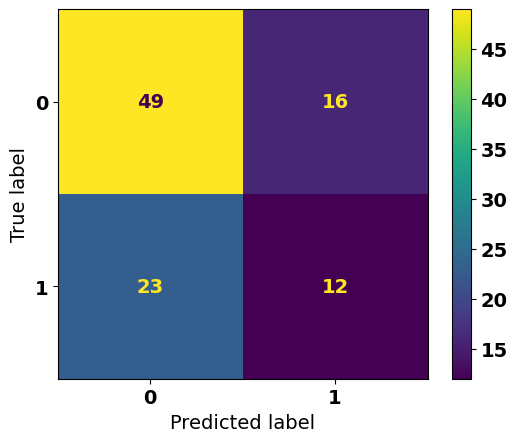

In [70]:
metrics.ConfusionMatrixDisplay.from_predictions(manual_check_output,predicted_output)
#disp = disp.plot(include_values=True, cmap="Reds", ax=None, xticks_rotation="horizontal")
font = {'family' : 'normal',
    'size'   : 16}
plt.rc('font', **font)